# Parameters




Parameters are shown in papers linked below.

1. [Durstewitz et. al., 2000 ](https://papers.cnl.salk.edu/PDFs/Dopamine-Mediated%20Stabilization%20of%20Delay-Period%20Activity%20in%20a%20Network%20Model%20of%20Prefrontal%20Cortex%202000-3711.pdf)
(Synaptic conductance; 근데 밑에 class 제작할 때는 2002 논문 parameter 사용?)

2. [Durstewitz et. al., 2002](https://www.bio.psy.ruhr-uni-bochum.de/bpsy/mam/content/documents/durstewitz_2002_the_computational_role_of_dopamine_d1.pdf)
(Morphology ~ Ionic conductance)

3. [Otani. et al, 2011](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=3f57d0ce041ff40785912241a47c9e9d2a528bba) (+0.001 term in soma_IKS, desired peak conductance)

4. [Tsodyks, M. V., & Markram, H. (1997)](https://www.pnas.org/doi/pdf/10.1073/pnas.94.2.719), [Durstewitz, D., & Gabriel, T. (2007)](https://academic.oup.com/cercor/article-abstract/17/4/894/377757) (utilization of synaptic efficacy (USE) & recovery time)

In [1]:
### Morphology (μm) ###

soma_l = 28.62
soma_d = 21.84

dend_l = 650
dend_d = 6.5

### Passive properties ###

soma_Rm = 30000     # membrane resistance (Ω*cm^2)
soma_Eleak = -70    # leakage reversal potential (mV)
soma_Cm = 1.2       # membrane capacitance (μF/cm^2)
soma_Ri = 150       # axial resistance (Ω*cm)

dend_Rm = soma_Rm / 1.92
dend_Eleak = -70
dend_Cm = soma_Cm * 1.92 
dend_Ri = 150

### Ionic conductances (S/cm^2) ###

soma_INa = 0.117      # Na+ current
soma_INaP = 0.0018     # persistent Na+ current
soma_IDR = 0.050       # delayed rectifier current
soma_IKS = 8e-5 + 0.001     # slowly inactivating K+ channel; +0.001 term comes from otani. et al
soma_IC = 0.0021       # fast Ca2+/V-dependent K+ channel
soma_IHVA = 0.0004     # high-voltage-activated Ca2+ channel

dend_INa = 0.02
dend_INaP = 0.0008
dend_IDR = 0.014
dend_IKS = soma_IKS
dend_IC = soma_IC
dend_IHVA = 0.0008

CAF = 600e-9   # calcium accumulation factor

### Synaptic conductance (Plasticity parameters; ms) ###

ampa_tau1 = 0.55
ampa_tau2 = 2.2

nmda_taus = 0.1    # voltage-dependent Mg21 block; s = 1.50265 * [1 + 0.33*exp(-0.06*Vm)]**(-1)
nmda_tau1 = 10.6
nmda_tau2 = 285.0

### Desired peak conductances (S/cm2)

g_AMPA_max = 4e-9
g_NMDA_max = g_AMPA_max / 50

USE = 0.6       # STD utilization parameter 
t_rec = 800     # recovery time (ms)

# Import Libraries

In [2]:
from neuron import h
import numpy as np
import matplotlib.pyplot as plt

h.load_file('stdrun.hoc')

### load ionic conductances ###

h.nrn_load_dll("./mods_tmp/arm64/.libs/libnrnmech.so")
mechanisms = ['naf', 'nap', 'hva', 'kdr', 'iks', 'ic', 'cadyn', 'kdyn']

# Generate Two-Compartment Model Neuron

In [3]:
### Create a soma ###

soma = h.Section(name='soma')

### Add morphology ###

soma.L = soma_l
soma.diam = soma_d

### Add passive properties ###

soma.insert('pas')
soma.g_pas = 1 / soma_Rm
soma.e_pas = soma_Eleak
soma.Ra = soma_Ri
soma.cm = soma_Cm

### Add ionic conductances ###

for i in mechanisms:
    soma.insert(i)

soma(0.5).nap.gnapbar = soma_INaP
soma(0.5).naf.gnafbar = soma_INa
soma(0.5).hva.ghvabar = soma_IHVA
soma(0.5).kdr.gkdrbar = soma_IDR
soma(0.5).iks.gKsbar = soma_IKS
soma(0.5).ic.gkcbar = soma_IC
soma(0.5).cadyn.CAF = CAF


In [4]:
### Create a dendrite ###

dend = h.Section(name='dend')

### Add morphology ###

dend.L = dend_l
dend.diam = dend_d

### Add passive properties ###

dend.insert('pas')  # Passive dendrite
dend.g_pas = 1 / dend_Rm
dend.e_pas = dend_Eleak
dend.Ra = dend_Ri
dend.cm = dend_Cm

# Add ionic conductances

for i in mechanisms:
    dend.insert(i)

dend(0.5).nap.gnapbar = dend_INaP
dend(0.5).naf.gnafbar = dend_INa
dend(0.5).hva.ghvabar = dend_IHVA
dend(0.5).kdr.gkdrbar = dend_IDR
dend(0.5).iks.gKsbar = dend_IKS
dend(0.5).ic.gkcbar = dend_IC
dend(0.5).cadyn.CAF = CAF

### Connect soma and dendrite ###
dend.connect(soma)

dend

In [5]:
h.psection()

soma { nseg=1  L=28.62  Ra=150
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert capacitance { cm=1.2}
	insert pas { g_pas=3.33333e-05 e_pas=-70}
	insert naf { gnafbar_naf=0.117}
	insert nap { gnapbar_nap=0.0018 DA_alphamshift_nap=0 DA_betamshift_nap=0 DA_alphahfactor_nap=0 DA_betahfactor_nap=0}
	insert na_ion { ena=50}
	insert hva { ghvabar_hva=0.0004}
	insert kdr { gkdrbar_kdr=0.05}
	insert iks { gKsbar_iks=0.00108}
	insert ic { gkcbar_ic=0.0021}
	insert cadyn { tca_cadyn=70}
	insert morphology { diam=21.84}
	insert ca_ion {}
	insert kdyn {}
	insert k_ion {}
}


1.0

In [6]:
h.topology()


|-|       soma(0-1)
   `|       dend(0-1)



1.0

# Ionic Conductance

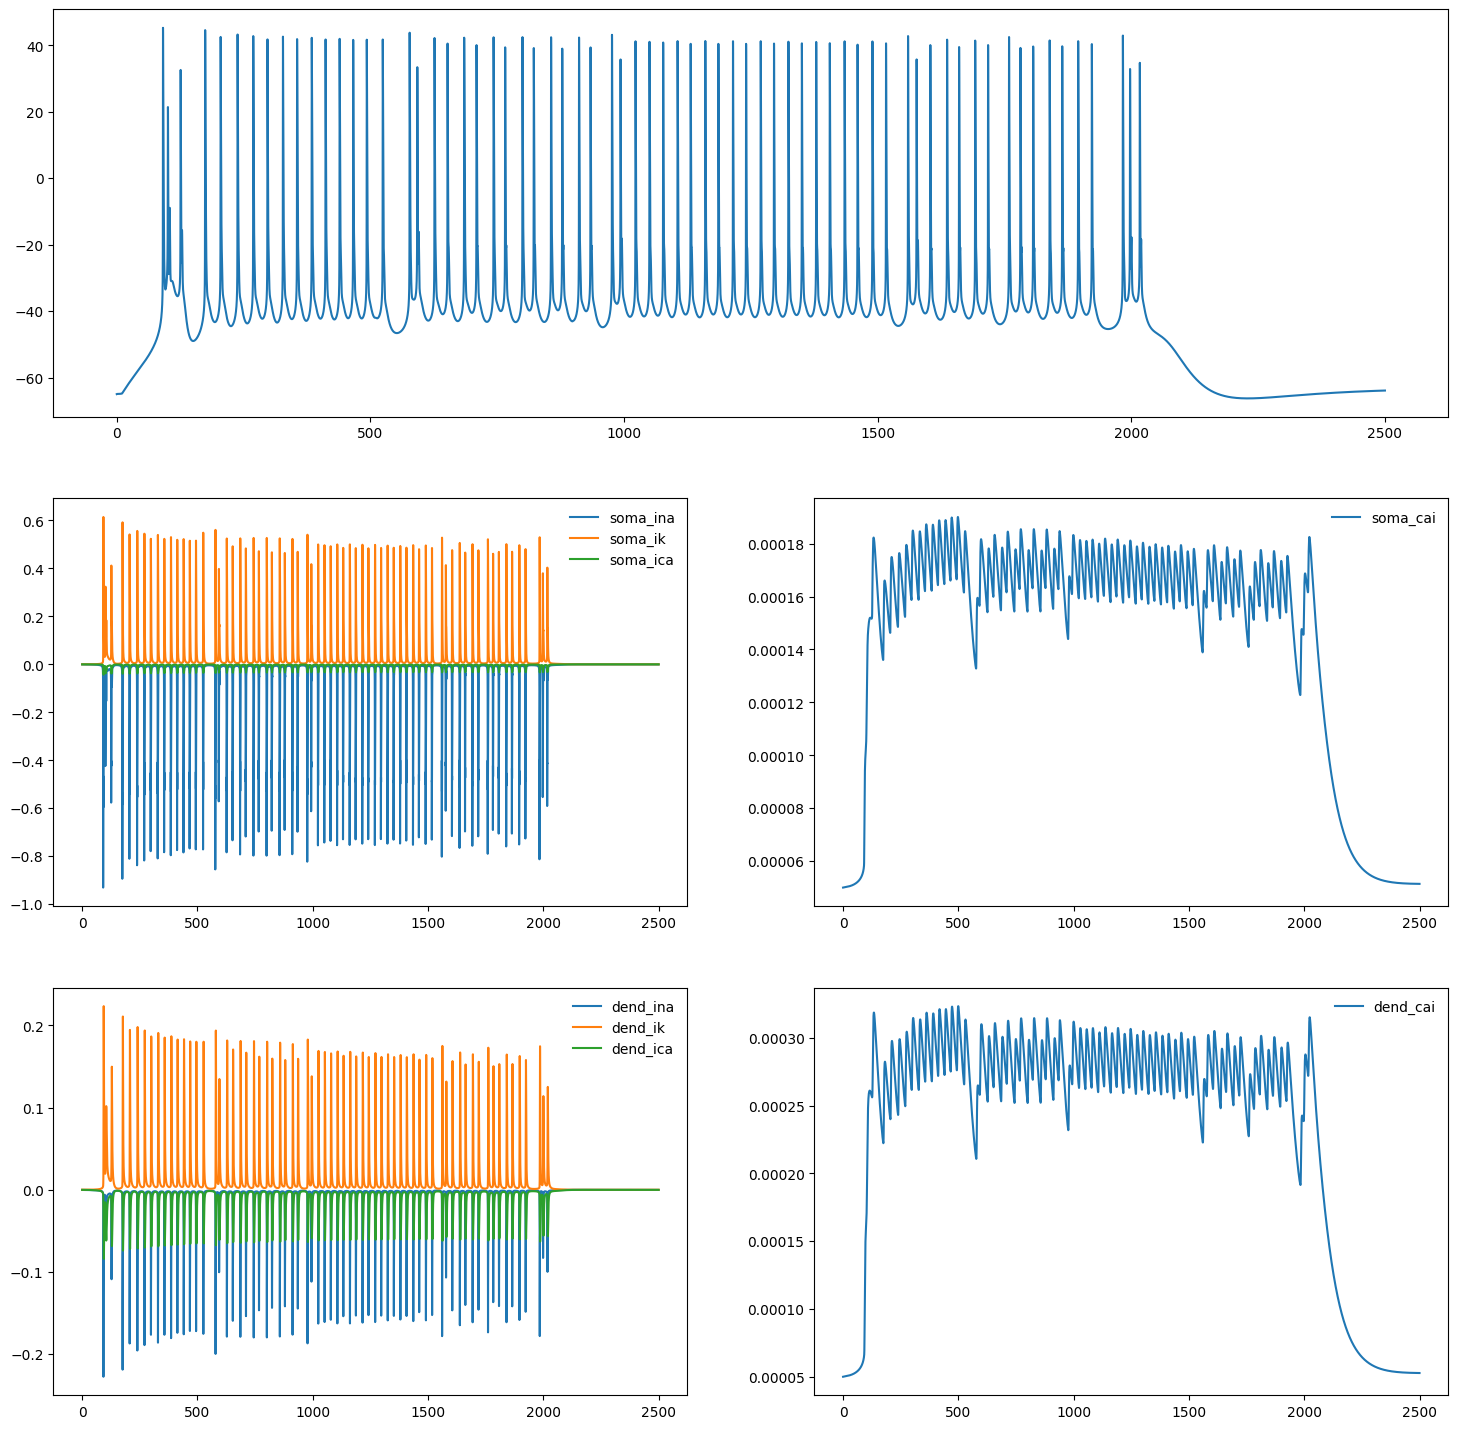

In [7]:
from neuron.units import mV, ms, µm, s
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

stim = h.IClamp(dend(0.5))
stim.delay = 10
stim.dur = 500
stim.amp = 0.075
t = h.Vector().record(h._ref_t)
dend_v = h.Vector().record(dend(0.5)._ref_v)
soma_v =  h.Vector().record(soma(0.5)._ref_v)

# Soma
soma_ina_vec = h.Vector().record(soma(0.5).na_ion._ref_ina)
soma_ena_vec = h.Vector().record(soma(0.5).na_ion._ref_ena)
soma_nai_vec = h.Vector().record(soma(0.5).na_ion._ref_nai)
soma_nao_vec = h.Vector().record(soma(0.5).na_ion._ref_nao)

soma_ik_vec = h.Vector().record(soma(0.5).k_ion._ref_ik)
soma_ki_vec = h.Vector().record(soma(0.5).k_ion._ref_ki)

soma_cai_vec = h.Vector().record(soma(0.5).ca_ion._ref_cai)
soma_cao_vec = h.Vector().record(soma(0.5).ca_ion._ref_cao)
soma_ica_vec = h.Vector().record(soma(0.5).ca_ion._ref_ica)

# Dendrite
dend_ina_vec = h.Vector().record(dend(0.5).na_ion._ref_ina)
dend_ena_vec = h.Vector().record(dend(0.5).na_ion._ref_ena)
dend_nai_vec = h.Vector().record(dend(0.5).na_ion._ref_nai)
dend_nao_vec = h.Vector().record(dend(0.5).na_ion._ref_nao)

dend_ik_vec = h.Vector().record(dend(0.5).k_ion._ref_ik)
dend_ki_vec = h.Vector().record(dend(0.5).k_ion._ref_ki)

dend_cai_vec = h.Vector().record(dend(0.5).ca_ion._ref_cai)
dend_cao_vec = h.Vector().record(dend(0.5).ca_ion._ref_cao)
dend_ica_vec = h.Vector().record(dend(0.5).ca_ion._ref_ica)


h.finitialize(-65 * mV)
h.continuerun(2500 * ms)

plt.figure(figsize=(18,18))

gs=GridSpec(3,2)
plt.subplot(gs[0,:])
plt.plot(t, soma_v)

plt.subplot(gs[1,0])
plt.plot(t, soma_ina_vec, label='soma_ina')
plt.plot(t, soma_ik_vec, label='soma_ik')
plt.plot(t, soma_ica_vec, label='soma_ica')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0);  

plt.subplot(gs[1,1])
plt.plot(t, soma_cai_vec, label='soma_cai')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0);  

plt.subplot(gs[2,0])
plt.plot(t, dend_ina_vec, label='dend_ina')
plt.plot(t, dend_ik_vec, label='dend_ik')
plt.plot(t, dend_ica_vec, label='dend_ica')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0);  

plt.subplot(gs[2,1])
plt.plot(t, dend_cai_vec, label='dend_cai')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0);  

# fig=plt.gcf()
# fig.savefig('./python_plot2.png', dpi=100)

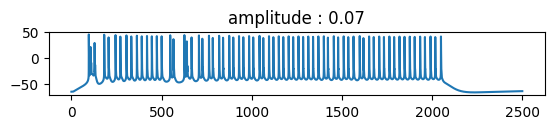

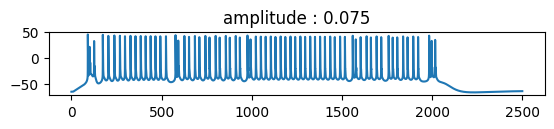

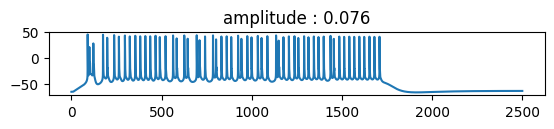

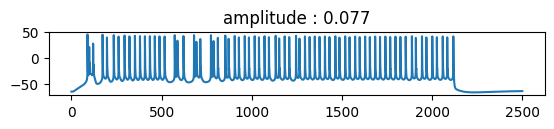

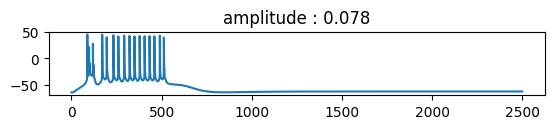

In [ ]:
amplitudes = [0.070, 0.075, 0.075, 0.076, 0.077, 0.078]

gs=GridSpec(len(amplitudes), 1)



for i, amp in enumerate(amplitudes):
    stim.amp = amp
    h.finitialize(-65)
    h.continuerun(2500)
    plt.subplot(gs[i, 0])
    plt.plot(t, soma_v, label=f'amp={amp}')
    plt.title("amplitude : " + f'{amp}')
    plt.show()

# Create Synapses

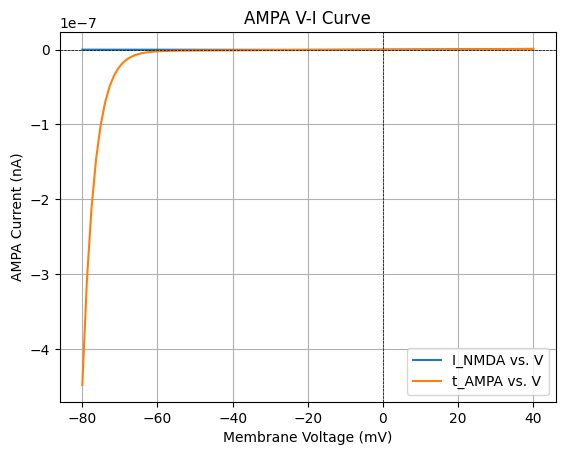

In [9]:
from neuron import h

# <double exponential equation of conductance>
# i = G * (v - e);      i(nanoamps), g(micromhos)
# G = weight * factor * (exp(-t/tau2) - exp(-t/tau1))

# <Syntax>
# syn = h.Exp2Syn(section(x))
# syn.tau1 --- ms rise time
# syn.tau2 --- ms decay time
# syn.e -- mV reversal potential
# syn.i -- nA synaptic current

class Synapse:
    def __init__(self, sec, weight=1.0):
        
        # Create AMPA synapse
        self.ampa = h.Exp2Syn(sec)
        self.ampa.tau1 = 0.2  # AMPA time constant 1 (ms)
        self.ampa.tau2 = 1.0  # AMPA time constant 2 (ms)
        self.ampa.e = 0.0  # AMPA reversal potential (mV)
        self.ampa_g_max = 4e-9
        
        # Create NMDA synapse
        self.nmda = h.Exp2Syn(sec)
        self.nmda.tau1 = 2.3  # NMDA time constant 1 (ms)
        self.nmda.tau2 = 95.0  # NMDA time constant 2 (ms)
        self.nmda.e = 0.0  # NMDA reversal potential (mV)
        self.nmda_g_max = 4e-9 / 500

        # Weight parameters
        self.ampa_weight = weight
        self.nmda_weight = 1.0  # Fixed efficacy for NMDA
        
        # Short-term depression parameters
        self.use = 0.3  # Utilization parameter
        self.t_rec = 800  # Recovery time constant (ms)
        self.residual_depression = 1.0  # Tracks depression state
        
        # Voltage-dependent NMDA gating from Mel (1993)
        self.tau_s = 0.1  # Time constant for Mg²⁺ block kinetics
        
    def nmda_gating(self, v):
        
        # voltage-dependent Mg2+ gating
        return 1.50265 / (1 + 0.33 * h.exp(-0.06 * v))
    
    def update_ampa(self, presynaptic_input, v):
        
        # Update AMPA conductance with plasticity and short-term depression
        self.residual_depression *= (1 - self.use)  # Apply depression
        self.ampa_g = self.ampa_g_max *  self.ampa_weight * presynaptic_input * self.residual_depression
        self.ampa_current = self.ampa_g * (v - self.ampa.e)
        
    def update_nmda(self, presynaptic_input, v):
        
        # Update NMDA conductance with voltage-dependent gating and compute current
        mg_block = self.nmda_gating(v)
        self.nmda_g = self.nmda_weight * mg_block * presynaptic_input
        self.nmda_current = self.nmda_g_max * self.nmda_g * (v - self.nmda.e) # I_NMDA = g_NMDA * s(V) * (V - E_NMDA)
    
    def recover_depression(self, dt):
        """Recover synaptic depression over time."""
        self.residual_depression += (1.0 - self.residual_depression) * (dt / self.t_rec)
    
    def update(self, presynaptic_input, v, dt):
        """Update both AMPA and NMDA conductances, including short-term depression recovery."""
        self.update_ampa(presynaptic_input, v)
        self.update_nmda(presynaptic_input, v)
        self.recover_depression(dt)

# Example usage
syn = Synapse(dend(0.5))

# syn.update(2.0, -65, 1.0)  # Example presynaptic input of 1.0, Vm=-65 mV, timestep dt=1.0 ms

# Define voltage range from -80 mV to +40 mV
voltages = np.linspace(-80, 40, 100)  # 100 points between -80 and 40 mV
nmda_currents = []
ampa_currents = []


# # Loop through voltage values and compute NMDA current
for v in voltages:
    syn.update(2.0, v, 1.0)  # Presynaptic input = 2.0, timestep dt = 1.0 ms
    nmda_currents.append(syn.nmda_current)
    ampa_currents.append(syn.ampa_current)


# Plot V-I curve
plt.plot(voltages, nmda_currents, label="I_NMDA vs. V")
plt.plot(voltages, ampa_currents, label="t_AMPA vs. V")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Zero current reference
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Zero voltage reference
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("AMPA Current (nA)")
plt.title("AMPA V-I Curve")
plt.legend()
plt.grid(True)
plt.show()

########################

# # Define simulation parameters
# T_max = 100  # Total simulation time (ms)
# dt = 1.0  # Time step (ms)
# time_points = np.arange(0, T_max, dt)  # Time vector
# ampa_conductances = []

# # Presynaptic input: A pulse at t=20ms, 40ms, 60ms
# presynaptic_inputs = np.zeros_like(time_points)
# presynaptic_inputs[20] = 1.0
# presynaptic_inputs[40] = 1.0
# presynaptic_inputs[60] = 1.0

# # Simulate over time
# for i, t in enumerate(time_points):
#     syn.update(presynaptic_inputs[i], -65, dt)  # Vm = -65 mV (resting potential)
#     ampa_conductances.append(syn.ampa_g)  # Store AMPA conductance

# # Plot AMPA conductance over time
# plt.figure(figsize=(6, 4))
# plt.plot(time_points, ampa_conductances, label="g_AMPA", color="red")
# plt.xlabel("Time (ms)")
# plt.ylabel("AMPA Conductance (µS)")
# plt.title("AMPA Conductance Over Time")
# plt.legend()
# plt.grid(True)
# plt.show()

In [10]:
from neuron import h

class AMPASynapse:
    def __init__(self, sec, weight=1.0):
    
        # Create AMPA synapses
        self.ampa = h.Exp2Syn(sec(0.5))
        self.ampa.tau1 = 0.2  # AMPA time constant 1 (ms)
        self.ampa.tau2 = 1.0  # AMPA time constant 2 (ms)
        self.ampa.e = 0.0  # AMPA reversal potential (mV)

        # Weight parameters
        self.ampa_weight = weight
    
        # Short-term depression parameters
        self.use = 0.6  # Utilization parameter
        self.t_rec = 800  # Recovery time constant (ms)
        self.residual_depression = 1.0  # Tracks depression state
   
    def update_ampa(self, presynaptic_input):
        """Update AMPA conductance with plasticity and short-term depression."""
        self.residual_depression *= (1 - self.use)  # Apply depression
        self.ampa.g = self.ampa_weight * presynaptic_input * self.residual_depression

    def recover_depression(self, dt):
        """Recover synaptic depression over time."""
        self.residual_depression += (1.0 - self.residual_depression) * (dt / self.t_rec)

    def update(self, presynaptic_input, v, dt):
        """Update both AMPA and NMDA conductances, including short-term depression recovery."""
        self.update_ampa(presynaptic_input)
        self.recover_depression(dt)

# Example usage
syn_A = AMPASynapse(soma)

# Define voltage range from -80 mV to +40 mV
voltages = np.linspace(-80, 40, 100)  # 100 points between -80 and 40 mV
ampa_currents = []

# Loop through voltage values and compute NMDA current
for v in voltages:
    syn_A.update(2.0, v, 1.0)  # Presynaptic input = 2.0, timestep dt = 1.0 ms
    i_ampa = syn_A.ampa_g * (v - syn.ampa.e)  # AMPA current calculation
    ampa_currents.append(i_ampa)

# Plot V-I curve
plt.figure(figsize=(6, 4))
plt.plot(voltages, ampa_currents, label="I_NMDA vs. V")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Zero current reference
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Zero voltage reference
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("NMDA Current (nA)")
plt.title("NMDA V-I Curve")
plt.legend()
plt.grid(True)
plt.show()

AttributeError: 'AMPASynapse' object has no attribute 'ampa_g'

In [ ]:
from neuron import h

class Synapse:
    def __init__(self, sec, weight=1.0):
        
        # Create AMPA synapse
        self.ampa = h.Exp2Syn(sec(0.5))
        self.ampa.tau1 = 0.2  # AMPA time constant 1 (ms)
        self.ampa.tau2 = 1.0  # AMPA time constant 2 (ms)
        self.ampa.e = 0.0  # AMPA reversal potential (mV)
        self.ampa_g_max = 4e-9
        
        # Create NMDA synapse
        self.nmda = h.Exp2Syn(sec(0.5))
        self.nmda.tau1 = 2.3  # NMDA time constant 1 (ms)
        self.nmda.tau2 = 95.0  # NMDA time constant 2 (ms)
        self.nmda.e = 0.0  # NMDA reversal potential (mV)
        self.nmda_g_max = 4e-9 / 50

        # Weight parameters
        self.ampa_weight = weight
        self.nmda_weight = 1.0  # Fixed efficacy for NMDA
        
        # Short-term depression parameters
        self.use = 0.3  # Utilization parameter
        self.t_rec = 800  # Recovery time constant (ms)
        self.residual_depression = 1.0  # Tracks depression state
        
        # Voltage-dependent NMDA gating from Mel (1993)
        self.tau_s = 0.1  # Time constant for Mg²⁺ block kinetics
        
    def nmda_gating(self, v):
        
        # voltage-dependent Mg2+ gating
        return 1.50265 / (1 + 0.33 * h.exp(-0.06 * v))
    
    def update_ampa(self, presynaptic_input):
        
        # Update AMPA conductance with plasticity and short-term depression
        self.residual_depression *= (1 - self.use)  # Apply depression
        self.ampa_g = self.ampa_g_max *  self.ampa_weight * presynaptic_input * self.residual_depression
        
    def update_nmda(self, presynaptic_input, v):
        
        # Update NMDA conductance with voltage-dependent gating and compute current
        mg_block = self.nmda_gating(v)
        self.nmda_g = self.nmda_weight * mg_block * presynaptic_input
        self.nmda_current = self.nmda_g_max * self.nmda_g * (v - self.nmda.e) # I_NMDA = g_NMDA * s(V) * (V - E_NMDA)
    
    def recover_depression(self, dt):
        """Recover synaptic depression over time."""
        self.residual_depression += (1.0 - self.residual_depression) * (dt / self.t_rec)
    
    def update(self, presynaptic_input, v, dt):
        """Update both AMPA and NMDA conductances, including short-term depression recovery."""
        self.update_ampa(presynaptic_input)
        self.update_nmda(presynaptic_input, v)
        self.recover_depression(dt)

# Example usage
syn = Synapse(dend)

# syn.update(2.0, -65, 1.0)  # Example presynaptic input of 1.0, Vm=-65 mV, timestep dt=1.0 ms

# Define voltage range from -80 mV to +40 mV
voltages = np.linspace(-80, 40, 100)  # 100 points between -80 and 40 mV
nmda_currents = []
ampa_currents = []


# # Loop through voltage values and compute NMDA current
for v in voltages:
    syn.update(2.0, v, 1.0)  # Presynaptic input = 2.0, timestep dt = 1.0 ms
    nmda_currents.append(syn.nmda_current)

# Loop through voltage values and compute AMPA current
for v in voltages:
    syn.update(2.0, v, 1.0)  # Presynaptic input = 2.0, timestep dt = 1.0 ms
    i_ampa = syn.ampa_g * (v - syn.ampa.e)  # AMPA current calculation
    ampa_currents.append(i_ampa)


# Plot V-I curve
plt.plot(voltages, nmda_currents, label="I_NMDA vs. V")
plt.plot(voltages, ampa_currents, label="t_AMPA vs. V")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Zero current reference
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Zero voltage reference
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("AMPA Current (nA)")
plt.title("AMPA V-I Curve")
plt.legend()
plt.grid(True)
plt.show()